# 1. Python được sử dụng như 1 chiếc máy tính bỏ túi


# Sử dụng "#" để ghi chú
# Heading 1
## Heading 2
### Học viện Ngân hàng

In [1]:
a =10
b = 20
a+b

30

In [2]:
(a+b)**2 + a*b

1100

In [3]:
import math # import thu vien thu vien Toan
print(math.cos(0))
print(math.sin(90))

1.0
0.8939966636005579


In [4]:
print(2+3*4) #14
print((2+3)*4) #20
print(2**10) #1024
print(6/3) #2.0
print(7/3) #2.33333333333
print(7//3) #2
print(7%3) #1
print(3/6) #0.5
print(3//6) #0
print(3%6) #3
print(2**100) # 1267650600228229401496703205376

14
20
1024
2.0
2.3333333333333335
2
1
0.5
0
3
1267650600228229401496703205376


# 2. Python còn dùng để phân tích dữ liệu được lưu trữ trong file excel hoặc csv và nhiều loại file dữ liệu khác nữa

2.1 Bài toán đặt ra như sau: Sinh viên khi ra trường thường thắc mắc mình đề xuất mức lương bao nhiêu là hợp lý: Nếu cao quá thì sẽ khó được nhà tuyển dụng chấp nhận và mất luôn cơ hội làm việc, nếu thấp quá thì sẽ thiệt thòi. Để giúp trả lời câu hỏi này, chúng ta sẽ phân tích thông tin dựa trên dữ liệu khảo sát mức lương của nhân viên có kinh nghiệm từ 0-10 năm của một số ngành. Các thông tin được thu thập bao gồm
- SoNamKinhNghiem: Số năm kinh nghiệm
- NganhNghe: ngành nghề
- Luong: Lương (triệu)

In [7]:
import math
import pandas as pd
#data, df:data frame, dt, 
dataset = pd.read_csv("input/work_data.csv")
dataset.tail() # Hien thi 5 dong du lieu cuoi cung
dataset.head() # Hien thi 5 dong du lieu dau tien
dataset.head(10) # Hien thi 10 dong du lieu dau tien

,SoNamKinhNghiem,Luong,NganhNghe
0,7,26.0,KeToan
1,4,13.8,KeToan
2,8,21.5,KeToan
3,9,24.0,KeToan
4,1,7.8,KeToan
5,2,10.0,KeToan
6,4,13.5,KeToan
7,5,15.8,KeToan
8,3,12.2,KeToan
9,2,10.0,KeToan


In [8]:
dataset.describe()

,SoNamKinhNghiem,Luong
count,1426.000000,1426.000000
mean,4.894109,16.316550
std,3.075541,6.548031
min,0.000000,5.400000
25%,2.000000,10.900000
50%,5.000000,16.200000
75%,7.000000,21.300000
max,10.000000,70.000000


In [9]:
import pandas as pd # Khai báo thư viện hỗ trợ đọc và phân tích dữ liệu ở dạng bảng
dataset = pd.read_csv("input/work_data.csv") # Lấy dữ liệu từ file work_data.csv 
# trong folder "input" đê phân tích và đặt tên dữ liệu đó là dataset
dataset.head() # xem 6 dòng đầu tiên của bảng dữ liệu

,SoNamKinhNghiem,Luong,NganhNghe
0,7,26.0,KeToan
1,4,13.8,KeToan
2,8,21.5,KeToan
3,9,24.0,KeToan
4,1,7.8,KeToan


## 2.2 Mô tả bộ dữ liệu

In [10]:
dataset.shape # số lượng quan sát

(1426, 3)

In [11]:
dataset.describe() 

,SoNamKinhNghiem,Luong
count,1426.000000,1426.000000
mean,4.894109,16.316550
std,3.075541,6.548031
min,0.000000,5.400000
25%,2.000000,10.900000
50%,5.000000,16.200000
75%,7.000000,21.300000
max,10.000000,70.000000


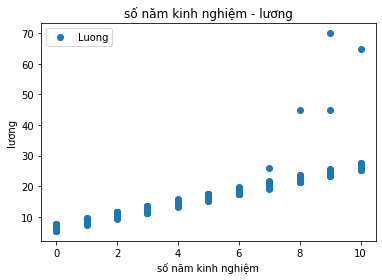

In [12]:
import matplotlib.pyplot as plt  # Khai báo thư viện để vẽ biểu đồ
dataset.plot(x='SoNamKinhNghiem', y='Luong', style='o')  
plt.title('số năm kinh nghiệm - lương')  
plt.xlabel('số năm kinh nghiệm')  
plt.ylabel('lương')  
plt.show()

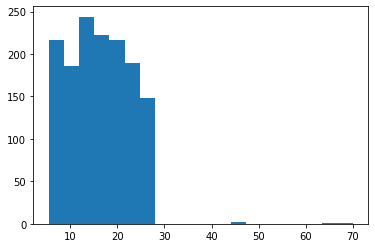

In [13]:
# vẽ biểu đồ histogram
plt.hist(dataset['Luong'],20)
plt.show()

In [14]:
df_keToan = dataset[dataset["NganhNghe"] == "KeToan"]
df_hcnh = dataset[dataset["NganhNghe"] == "HCNS"]
df_sale = dataset[dataset["NganhNghe"] == "Sale"]

print ("Kết cấu bộ dữ liệu")
print ("Số lượng mẫu nhân viên kế toán: " + str(df_keToan.shape[0]))
print ("Số lượng mẫu nhân viên HCNH: " + str(df_hcnh.shape[0]))
print ("Số lượng mẫu nhân viên SALE: " + str(df_sale.shape[0]))


Kết cấu bộ dữ liệu
Số lượng mẫu nhân viên kế toán: 472
Số lượng mẫu nhân viên HCNH: 566
Số lượng mẫu nhân viên SALE: 388


In [15]:
n_by_nganhNghe = dataset.groupby("NganhNghe")["Luong"].mean()
n_by_nganhNghe

NganhNghe
HCNS      16.556537
KeToan    15.645975
Sale      16.782216
Name: Luong, dtype: float64

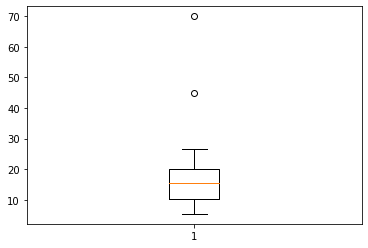

In [16]:
# Biểu đồ phân bố lương của nhân viên Kế toán
plt.boxplot(df_keToan['Luong'])
plt.show()

In [17]:
# Bài tập: Vẽ box plot lương của nhân viên ngành HCNS và Sale 

## 2.3 Xây dựng model dự đoán tiền lương theo số năm kinh nghiệm


In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X = dataset['SoNamKinhNghiem'].values.reshape(-1,1)
y = dataset['Luong'].values.reshape(-1,1)
# chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  # Khai báo mô hình hồi quy tuyến tính
regressor.fit(X_train, y_train) #Huấn luyện mô hình
print("Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm \nvới các hệ số a và b lần lượt là")
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm 
với các hệ số a và b lần lượt là
[6.35592115]
[[2.03289729]]


## Đánh giá tính chính xác của mô hình

In [19]:
y_pred = regressor.predict(X_test) # dự đoán trên số năm kinh nghiệm của bộ dữ liệu test
## tính toán R2 của model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, regressor.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))

df = pd.DataFrame({'số năm kinh nghiệm': X_test.flatten(), 'Lương Thực tế': y_test.flatten(), 'Lương Dự báo': y_pred.flatten()})
print("\n") # xuống dòng
print("đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred))  


R2 trên tập huấn luyện của model là:0.9318331044271062
R2 trên tập kiểm tra của model là:0.8762196686203844


đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 0.5566819767125354


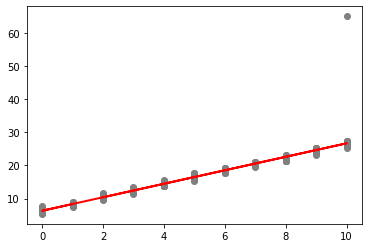

In [20]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Hướng dẫn lưu trữ và sử dụng mô hình sau đã huấn luyện

In [23]:
# lưu trữ mô hình vào máy tính
import pickle # thư viện  giúp lưu trữ mô hình
filename = 'model.sav'
pickle.dump(regressor, open(filename, 'wb'))

# Some time later.....str
# sử dụng mô hình
#loaded_model = LinearRegression()
loaded_model = pickle.load(open(filename, 'rb'))
x = [[1],[2],[4]]
y_pred = loaded_model.predict(x)
y_pred

array([[ 8.38881844],
       [10.42171574],
       [14.48751032]])